## Data exploration Notebook


In [37]:
# Initialize libraries, load data sources
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 

# Initialize variables
fileInputEcommerceSales='ecommerce_sales_2011_2015.csv'
fileInputTotalRetailSales='total_retail_sales.csv'

# Open input file, read into frame (source:  US Census Bureau)
# Ecommerce sales by NAICS Code
dfEcommerceSales = pd.read_csv(fileInputEcommerceSales)
# Total retails sales by NAICS Code
dfInputTotalRetailSales = pd.read_csv(fileInputTotalRetailSales)

In [38]:
dfEcommerceSales.head()

,NAICS_Code,Description,2015,2014,2013,2012,2011
0,441,Motor vehicle and parts dealers,528,497,428,393,310
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239
4,445,Food and beverage stores,1018,916,813,779,692


In [39]:
dfInputTotalRetailSales.head()

,NAICS_Code,Description,2015,2014,2013,2012,2011,2010,2009,2008,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,441,Motor vehicle and parts dealers,1095412,1020851,959294,886494,812938,742913,671772,785865,...,815579,796210,764204,688415,653817,627507,579715,541141,472916,418393
1,4411,Automobile dealers,941339,875566,819290,752778,684505,621180,551996,649505,...,707676,687782,661820,593501,564658,543949,501684,468100,407126,358444
2,44111,New car dealers,842120,785142,735374,672550,608788,549473,486565,575593,...,649413,630123,606167,542559,518972,502340,464642,435661,379522,333801
3,44112,Used car dealers,99219,90424,83916,80228,75717,71707,65431,73912,...,58263,57659,55653,50942,45686,41609,37042,32439,27604,24643
4,4412,Other motor vehicle dealers,64740,59531,54996,49581,45469,43794,45550,60042,...,46811,44989,39735,34915,30615,27994,26128,23801,20980,18026


In [40]:
# Join total retails sales to ecommerce sales on NAICS Code
dfJoinedSales=dfEcommerceSales.join(dfInputTotalRetailSales.set_index('NAICS_Code'),
                                    on='NAICS_Code', 
                                    how='left', 
                                    lsuffix='_ecom', 
                                    rsuffix='_total', 
                                    sort=False)
dfJoinedSales

,NAICS_Code,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,441,Motor vehicle and parts dealers,528,497,428,393,310,Motor vehicle and parts dealers,1095412,1020851,...,815579,796210,764204,688415,653817,627507,579715,541141,472916,418393
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,...,91484,91170,84294,77412,72715,67707,63470,60416,55456,52336
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,...,80240,82206,78977,74527,70061,68363,64770,57266,48614,42631
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,...,239379,228994,218290,202423,191063,176683,164561,157228,140964,130989
4,445,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,...,462429,444764,433699,416525,409373,401073,390386,384340,374516,370513
5,446,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,...,166533,155234,142699,129583,118672,109557,101635,96363,92594,89705
6,447,Gasoline stations,0,0,0,0,0,Gasoline stations,443817,538790,...,251383,249816,212524,191727,199700,194425,181113,171222,162376,156324
7,448,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,...,167287,167674,159751,149151,140293,136581,131333,129083,124749,120103
8,451,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,...,76836,75808,72458,68645,65288,63768,60642,57249,52091,49026
9,452,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,...,427468,404228,380179,351081,331363,315305,300498,285190,265996,247876


In [41]:
# Roll up categories by year for total and ecommerce sales

esales2015=dfJoinedSales['2015_ecom'].sum()
tsales2015=dfJoinedSales['2015_total'].sum()
esales2014=dfJoinedSales['2014_ecom'].sum()
tsales2014=dfJoinedSales['2014_total'].sum()
esales2013=dfJoinedSales['2013_ecom'].sum()
tsales2013=dfJoinedSales['2013_total'].sum()
esales2012=dfJoinedSales['2012_ecom'].sum()
tsales2012=dfJoinedSales['2012_total'].sum()
esales2011=dfJoinedSales['2011_ecom'].sum()
tsales2011=dfJoinedSales['2011_total'].sum()

dfRollup = pd.DataFrame(data={'Type':{0: 'eCommerce'},
                             '2015':{0: esales2015},
                             '2014':{0: esales2014},
                             '2013':{0: esales2013},
                             '2012':{0: esales2012},
                             '2011':{0: esales2011}})

dfRollup = dfRollup[['Type', '2015', '2014', '2013', '2012', '2011']]
dfRollup.loc[1]=['Total Retail',tsales2015,tsales2014,tsales2013,tsales2012,tsales2011]

dfRollup

,Type,2015,2014,2013,2012,2011
0,eCommerce,294809,256269,221587,195477,168919
1,Total Retail,4727427,4639440,4458450,4302229,4102952


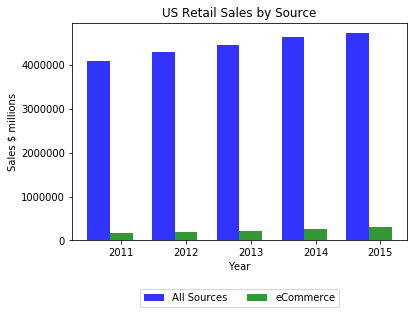

In [48]:
# create plot of ecommerce compared to total retail sales
n_groups=5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
SalesTotalRetail = (dfRollup['2011'][1], 
                    dfRollup['2012'][1], 
                    dfRollup['2013'][1],
                    dfRollup['2014'][1],
                    dfRollup['2015'][1])

SalesEcommerce = (dfRollup['2011'][0],
                  dfRollup['2012'][0],
                  dfRollup['2013'][0],
                  dfRollup['2014'][0],
                  dfRollup['2015'][0])
 
rects1 = plt.bar(index, SalesTotalRetail, bar_width,
                 alpha=opacity,
                 color='Blue',
                 label='All Sources')
 
rects2 = plt.bar(index + bar_width, SalesEcommerce, bar_width,
                 alpha=opacity,
                 color='Green',
                 label='eCommerce')

plt.xlabel('Year')
plt.ylabel('Sales $ millions')
plt.title('US Retail Sales by Source')
plt.xticks(index + bar_width, ('2011', '2012', '2013', '2014', '2015'))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()

In [62]:
# Add computed colums for % of ecommerce sales by category - sort by most penetrated NAICS Code
# Which categories have the most ecommerce penetration?

dfJoinedSales['2015_pct_ecom']=dfJoinedSales['2015_ecom'] / dfJoinedSales['2015_total']
dfJoinedSales['2014_pct_ecom']=dfJoinedSales['2014_ecom'] / dfJoinedSales['2014_total']
dfJoinedSales['2013_pct_ecom']=dfJoinedSales['2013_ecom'] / dfJoinedSales['2013_total']
dfJoinedSales['2012_pct_ecom']=dfJoinedSales['2012_ecom'] / dfJoinedSales['2012_total']
dfJoinedSales['2011_pct_ecom']=dfJoinedSales['2011_ecom'] / dfJoinedSales['2011_total']
dfJoinedSales.sort_values('2015_pct_ecom', ascending=False)

,NAICS_Code,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,...,1996,1995,1994,1993,1992,2015_pct_ecom,2014_pct_ecom,2013_pct_ecom,2012_pct_ecom,2011_pct_ecom
11,454,Nonstore retailers,192120,161653,138729,119562,102104,Nonstore retailers,509267,470867,...,117761,103516,96280,85811,78501,0.377248,0.343309,0.320297,0.292921,0.271305
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,...,68363,64770,57266,48614,42631,0.200219,0.191735,0.174916,0.169028,0.150719
7,448,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,...,136581,131333,129083,124749,120103,0.094727,0.087557,0.080765,0.070069,0.063017
10,453,Miscellaneous store retailers,10660,10824,8034,9026,9121,Miscellaneous store retailers,119461,115878,...,82819,75977,69457,61545,54840,0.089234,0.093409,0.071469,0.082041,0.084141
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,...,67707,63470,60416,55456,52336,0.062859,0.057633,0.049765,0.043445,0.037974
8,451,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,...,63768,60642,57249,52091,49026,0.061668,0.061323,0.058443,0.064521,0.060089
9,452,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,...,315305,300498,285190,265996,247876,0.033375,0.030215,0.027702,0.024700,0.022448
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,...,176683,164561,157228,140964,130989,0.019874,0.016595,0.013923,0.010517,0.008309
5,446,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,...,109557,101635,96363,92594,89705,0.014556,0.013958,0.013674,0.012876,0.010257
4,445,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,...,401073,390386,384340,374516,370513,0.001485,0.001369,0.001269,0.001240,0.001136
